In [19]:
#Question 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [20]:
data = pd.read_excel("datasets/cars_1.xlsx")
data.head()

,Brand,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,audi,sedan,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,audi,sedan,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


In [21]:
data_reduced = data.drop(['Brand','Type'], axis=1)
data_reduced.head()

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


In [22]:
data_standardized = (data_reduced - data_reduced.mean())/data_reduced.std()
data_standardized.head()

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,-1.672937,-0.427682,-0.830021,-2.078396,-0.024937,-0.423064,0.040508,-0.293571,0.191167,-0.673506,-0.554152,0.011021
1,-1.672937,-0.427682,-0.830021,-2.078396,-0.024937,-0.423064,0.040508,-0.293571,0.191167,-0.673506,-0.554152,0.375079
2,-0.716748,-0.238356,-0.181493,-0.595186,0.492983,1.518052,0.565521,-0.293571,1.314455,-0.980002,-0.698232,0.375079
3,0.077376,0.187627,0.235418,0.187620,0.494866,0.547494,0.183693,-0.539665,0.295659,-1.133250,-1.274550,0.490173
4,0.142203,0.242847,0.189095,-0.306784,-0.102155,0.547494,0.183693,-0.416618,0.165044,-0.980002,-0.842311,0.223641


In [23]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=12).fit(data_standardized)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_standardized) #transform the recentered data
pca_samples[0:5,:]

array([[-0.74114626,  2.34059284,  0.28457978, -1.35099246,  0.66722914,
         0.1377731 , -0.13861549, -0.33541333, -0.46449358,  0.54612314,
         0.07744698,  0.07314978],
       [-0.62200627,  2.36366129,  0.36291271, -1.2940469 ,  0.72257863,
        -0.09552272, -0.04727562, -0.50758595, -0.56878009,  0.52891793,
         0.11780544,  0.08563074],
       [ 1.42513484,  1.91428919,  0.54463478,  0.35055345,  0.7087404 ,
         0.61498432,  0.03987999,  0.27431143,  0.03750828, -0.1988662 ,
         0.26893401, -0.20489782],
       [ 1.57091147,  0.70115819, -0.75267462,  0.0659104 ,  0.36116867,
         0.47896056,  0.33250428, -0.45282333, -0.07477002,  0.04129245,
         0.15277838,  0.03891662],
       [ 1.01811302,  0.7751344 , -0.42866986, -0.0965602 , -0.05188732,
         0.5188022 ,  0.22121094, -0.34404146, -0.3151937 , -0.20431666,
        -0.2386293 , -0.07786448]])

In [24]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [25]:
pca_results = pca_results(data_standardized, pca)
pca_results

,Eigenvalue,Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.5393,0.6283,0.2780,0.3217,0.3217,0.1031,0.3492,0.2662,0.3307,0.0019,0.3077,-0.3122,-0.3221,0.3273
PC 2,1.9905,0.1659,-0.3786,-0.2438,-0.1767,-0.5350,-0.0932,0.2186,0.1303,-0.4954,0.2996,-0.2065,-0.1566,0.0634
PC 3,1.0759,0.0897,-0.1227,-0.1356,0.0469,-0.3656,0.0432,0.3895,0.2701,0.6048,0.0507,0.3212,0.2939,0.2152
PC 4,0.4356,0.0363,-0.0154,-0.1253,-0.2260,0.5930,-0.1530,0.5710,0.1468,-0.3265,-0.0594,0.2048,0.1839,0.1564
PC 5,0.3145,0.0262,-0.4582,-0.1332,-0.4102,0.3830,0.0752,-0.1655,-0.0518,0.4320,0.3059,-0.2700,-0.2130,0.1520
PC 6,0.1862,0.0155,-0.0211,-0.0042,-0.0417,-0.0245,0.0228,0.5130,-0.0609,0.2334,-0.2730,-0.2393,-0.3644,-0.6408
PC 7,0.1328,0.0111,-0.3196,-0.3073,0.7035,0.1341,-0.2373,0.1023,-0.3362,0.0349,-0.1373,-0.1059,-0.1285,0.2509
PC 8,0.1106,0.0092,-0.3249,0.3261,0.3063,0.1462,0.0098,0.0459,-0.0413,-0.0542,0.5662,0.1578,0.3114,-0.4729
PC 9,0.0799,0.0067,0.2514,-0.7389,0.1655,0.1418,0.2785,-0.1683,0.2647,-0.0265,0.2356,0.1479,-0.0852,-0.2865
PC 10,0.0709,0.0059,-0.5198,0.1010,0.1254,0.0776,0.4298,-0.1762,0.4607,-0.1497,-0.4920,0.0312,0.0465,-0.0473


<Figure size 640x480 with 0 Axes>

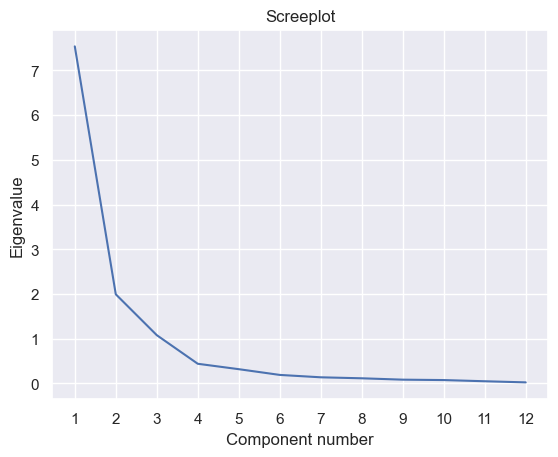

In [26]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [27]:
#Extract only the three PCs
pca2 = PCA(n_components=3).fit(data_standardized)
scores2 = pca2.transform(data_standardized)
scores2

array([[-7.41146262e-01,  2.34059284e+00,  2.84579784e-01],
       [-6.22006267e-01,  2.36366129e+00,  3.62912712e-01],
       [ 1.42513484e+00,  1.91428919e+00,  5.44634784e-01],
       [ 1.57091147e+00,  7.01158194e-01, -7.52674623e-01],
       [ 1.01811302e+00,  7.75134396e-01, -4.28669861e-01],
       [ 2.86875883e+00, -9.20015644e-01, -9.02075724e-01],
       [ 2.98907107e+00, -9.30035993e-01, -8.61574039e-01],
       [ 3.81017919e+00, -5.39464138e-01, -1.08419214e+00],
       [-1.33199327e-01, -2.60531615e-01, -5.33479919e-01],
       [-5.94468040e-02, -3.72412445e-02, -8.02399832e-01],
       [-3.98214138e-02, -3.34412826e-02, -7.89496405e-01],
       [ 1.58926289e+00,  7.58780696e-01,  3.74207184e-01],
       [ 1.63078480e+00,  7.50162476e-01,  3.82206288e-01],
       [ 2.93133730e+00, -3.10802160e-02, -2.17850087e-02],
       [ 4.46765308e+00,  9.19384253e-01,  5.20984729e-02],
       [ 4.93987879e+00,  9.91620232e-01,  3.08844895e-01],
       [ 5.17065709e+00,  1.24070467e+00

In [28]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)    
    return ax

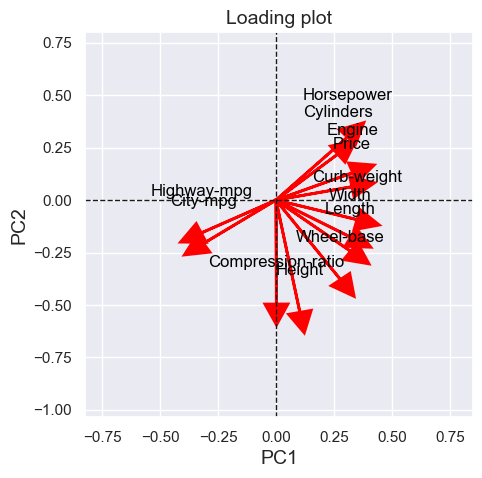

In [29]:
plt.clf
ax2 = loadingplot(data_standardized,pca2)
plt.show()

In [30]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_standardized, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2','PC3'])
scores2_notcentred

,PC1,PC2,PC3
0,-0.741146,2.340593,0.284580
1,-0.622006,2.363661,0.362913
2,1.425135,1.914289,0.544635
3,1.570911,0.701158,-0.752675
4,1.018113,0.775134,-0.428670
...,...,...,...
190,2.893436,-0.645900,-1.150609
191,2.689394,-1.086446,-0.995943
192,3.681629,-0.243971,-0.278898
193,2.847744,-2.653214,2.222379


In [31]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC2",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

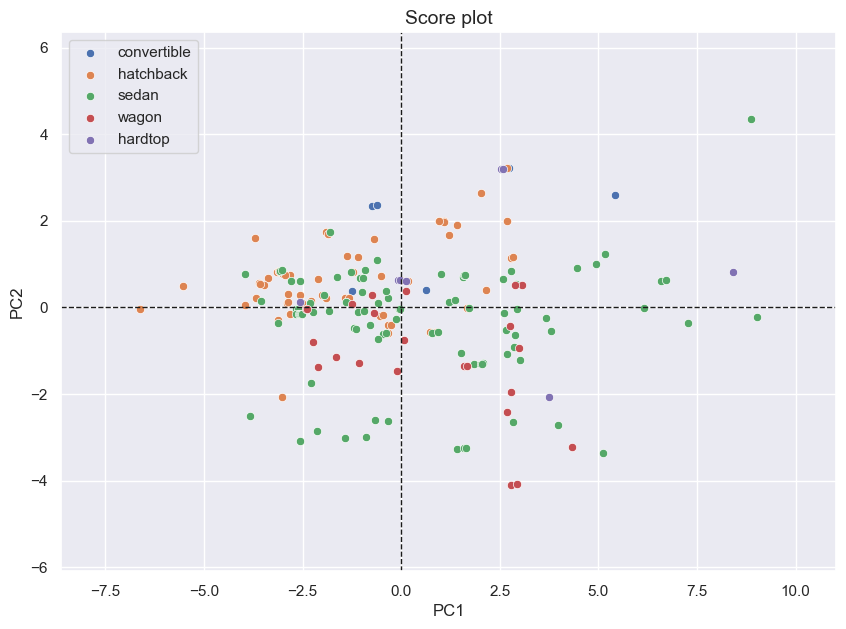

In [32]:
plt.clf
ax3 = scoreplot_label(data, scores2_notcentred, pca, width=10, margin=2)
plt.show()

In [33]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data['Type'] == product_type
        ax = sns.scatterplot(x="PC1", y="PC3",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC3'].min(),0)-margin
    y_max = max(scores['PC3'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

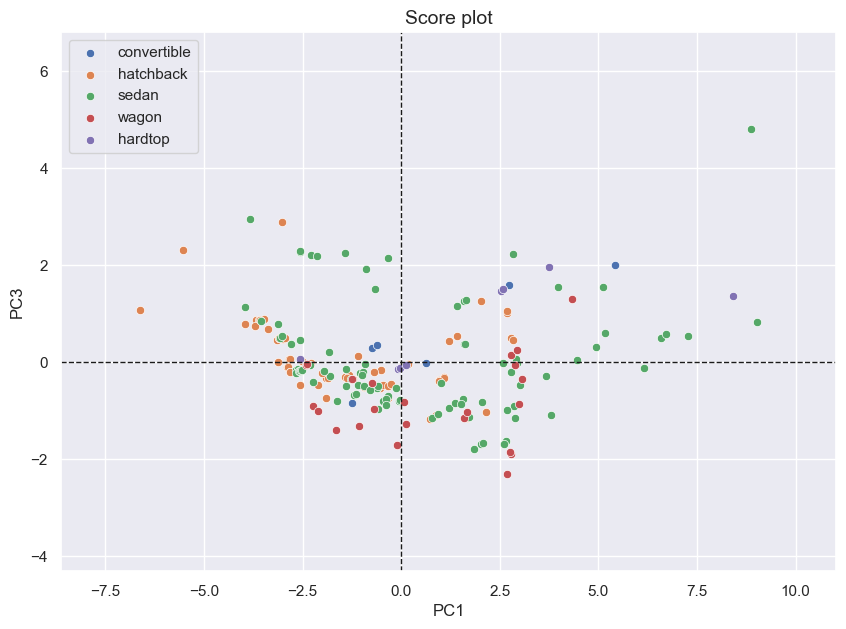

In [34]:
plt.clf
ax3 = scoreplot_label(data, scores2_notcentred, pca, width=10, margin=2)
plt.show()

In [35]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=10, height=7, margin=10):
    plt.figure(figsize=(width, height))
    productType = data['Type'].unique()
    for i,product_type in enumerate(productType):
        mask = data['Type'] == product_type
        ax = sns.scatterplot(x="PC2", y="PC3",data =scores[mask],label=product_type)
    
    #Set limits for figure
    x_min = min(scores['PC2'].min(),0)-margin
    x_max = max(scores['PC2'].max(),0)+margin
    y_min = min(scores['PC3'].min(),0)-margin
    y_max = max(scores['PC3'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    return ax

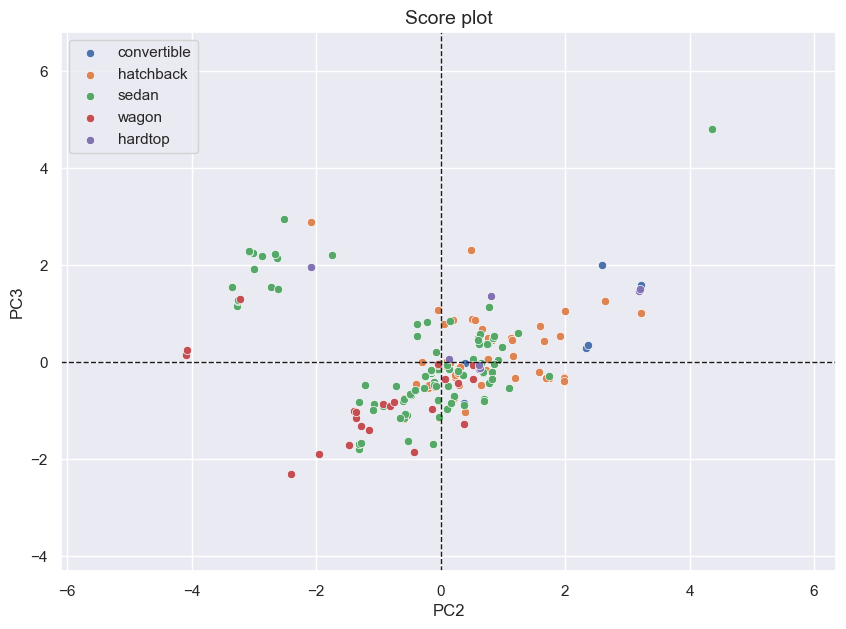

In [36]:
plt.clf
ax3 = scoreplot_label(data, scores2_notcentred, pca, width=10, margin=2)
plt.show()